## geom_imshow() and geom_raster()

`geom_imshow()` displays an image specified by 2D or 3D Numpy array.

Whether the image is grayscale or color depends on the shape of the image array:
- (M, N) - grey-scale image
- (M, N, 3) - color RGB image
- (M, N, 4) - color RGB image with alpha channel

For example, you can create an RGB image array from a PNG file using `PIL` and `io` packages.

`geom_raster()` on the other hand is a regular `ggplot` graphic layer wich takes a data-frame as the input 
and applies the aesthetic mappings as specified by the `aes()` function.


In [1]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')

image = Image.open(BytesIO(response.content))
img = np.asarray(image)
img.shape


(225, 225, 3)

### RGB image

M x N x 3 `ndarray` specifies a color RGB image.



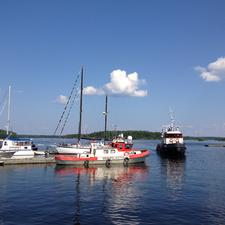

In [3]:
ggplot() + geom_imshow(img)

### Grayscale image

M x N `ndarray` specifies a grayscale image.

We will generate a grayscale image from RGB image above
by selecting only its `R` channel.


In [4]:
img_gs = img[:,:,0]
img_gs.shape

(225, 225)


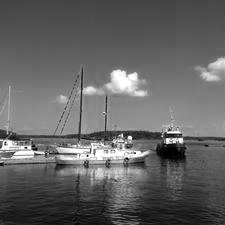

In [5]:
ggplot() + geom_imshow(img_gs)

### Grayscale image in pseudo colors (cmap)



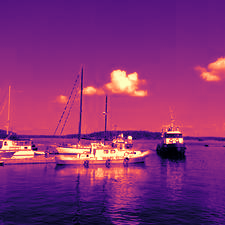

In [6]:
ggplot() + geom_imshow(img_gs, cmap="magma")

### `geom_raster()`

The `geom_raster()` function also can display image. But unlike `geom_imshow()`, `geom_raster()` doesn't accept `ndarray` as an input.

As a regular `ggplot` graphic layer, `geom_raster()` requires an observations-style input data and aestetic mapping.

This is not very convenient when the data is originally in the form of `ndarray`. On the other hand, aesthetic mapping and color scales might come in handy when rendering an image.

Lets transform the image data to a data-frame suitable for `geom_raster()`.

In [7]:
# reshape 3-dimentional ndarray to 2-dimentional long-form ndarray
# and then to data frame with columns x,y,r,g,b
cols, rows, _ = img.shape
img_lf = img.reshape(cols * rows, -1)
img_df = pd.DataFrame(img_lf,columns=['r','g','b'])
X_mesh, Y_mesh = np.meshgrid(np.arange(rows), np.arange(cols))
img_df['x'] = X_mesh.reshape(-1)
img_df['y'] = Y_mesh.reshape(-1)[::-1]

# Pack color components values to 24-bit RGB values 
c_fill = img_df.apply(lambda row: ((int(row['r'] * 255) << 16) + 
                                   (int(row['g'] * 255) << 8) +
                                   int(row['b'] * 255)),
                      axis=1)

In [8]:
# Show image in pseudo colors with only few gradations 
(ggplot(img_df) + geom_raster(aes('x', 'y', fill=c_fill), show_legend=False)
        + scale_fill_brewer()
        + ggtitle('Raster geom with brewer palette') + ggsize(800,500))